In [1]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
df

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [2]:
# Separando as variáveis

x_raw = df.drop(columns=['id','diagnostico','exame_33'])          # Variáveis 
y_raw = df['diagnostico']                                                            # Resultado

In [3]:
# Separando os dados, criando e testando o modelo

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

SEED = 5
np.random.seed(SEED)

train_x,test_x,train_y,test_y = train_test_split(x_raw,y_raw, test_size=0.25)

modelo = RandomForestClassifier(n_estimators = 100)
modelo.fit(train_x, train_y)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(train_x, train_y)
score = dummy.score(test_x, test_y)

print('O resultado do algoritmo base é ', score)

resultado = modelo.predict(test_x) 
acuracia = accuracy_score(test_y,resultado)
print(' ')
print('A acurancia do modelo é', acuracia)

O resultado do algoritmo base é  0.6153846153846154
 
A acurancia do modelo é 0.9790209790209791


<function matplotlib.pyplot.show(close=None, block=None)>

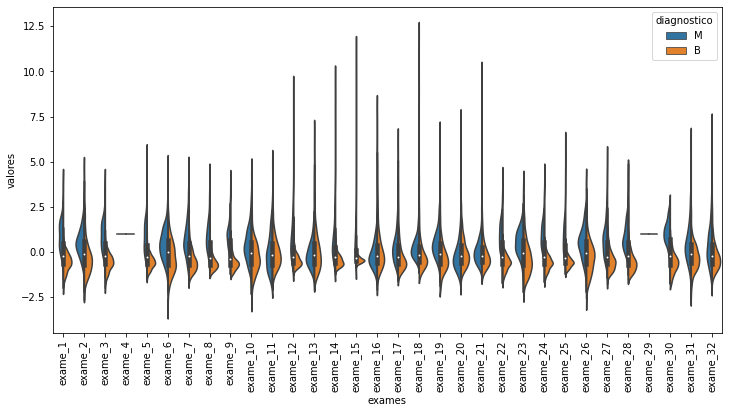

In [4]:
# Visualizando valores constantes

import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

padronizador = StandardScaler()
padronizador.fit(x_raw)
valores_exames =padronizador.transform(x_raw)
valores_exames = pd.DataFrame(data = valores_exames, columns=x_raw.keys())

dados_plot = pd.concat([valores_exames,y_raw], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',var_name='exames', value_name='valores')

plt.figure(figsize=(12,6))
sns.violinplot(x ='exames' , y = 'valores', hue ='diagnostico' , data =dados_plot, split=True)
plt.xticks(rotation = 90)
plt.show


In [35]:
# Tirando valores constantes
x = x_raw.drop(columns = ['exame_4', 'exame_29'])

# Tirando valores altamente correlacionados
matriz_corr = x.corr()
matriz_corr = matriz_corr[matriz_corr>0.99]
matriz_corr = matriz_corr.sum()
variaveis_corr = matriz_corr[matriz_corr>1]
x = x_raw.drop(columns=['exame_1', 'exame_22'])

In [34]:
SEED = 5
np.random.seed(SEED)

train_x,test_x,train_y,test_y = train_test_split(x, y_raw, test_size=0.25)

modelo = RandomForestClassifier(n_estimators = 100)
modelo.fit(train_x, train_y)

resultado = modelo.predict(test_x) 
acuracia = accuracy_score(test_y,resultado)
print(' ')
print('A acurancia do modelo é', acuracia)

 
A acurancia do modelo é 0.972027972027972


In [39]:
# Escolhendo somente as melhores variáveis


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k =5)



In [40]:
SEED = 5
np.random.seed(SEED)

train_x,test_x,train_y,test_y = train_test_split(x, y_raw, test_size=0.25)

selecionar_kmelhores.fit(train_x,train_y)

train_x_kbest  = selecionar_kmelhores.transform(train_x)
test_x_kbest = selecionar_kmelhores.transform(test_x)

modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(train_x_kbest, train_y)

resultado = modelo.predict(test_x_kbest) 
acuracia = accuracy_score(test_y,resultado)
print(' ')
print('A acurancia do modelo é', acuracia)

 
A acurancia do modelo é 0.958041958041958
